In [1]:
# Two Schools
# Data attributes: student grades, demographoc, social and school related features.
# Performance in two subjects: Mat and Por (portuguese)
# Important Note: G3 target has strong correlation with attributes G2 and G1. (Because G3 is the final year grade.)
# Is dificult predict G3 without G2 and G1.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

In [4]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df_mat.columns[df_mat.isnull().sum() > 0]

Index([], dtype='object')

In [6]:
# Check missing values
df_por.columns[df_por.isnull().sum() > 0]

Index([], dtype='object')

In [7]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
# Understand Feature Types
df_mat.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      5 non-null      object
 1   sex         5 non-null      object
 2   age         5 non-null      int64 
 3   address     5 non-null      object
 4   famsize     5 non-null      object
 5   Pstatus     5 non-null      object
 6   Medu        5 non-null      int64 
 7   Fedu        5 non-null      int64 
 8   Mjob        5 non-null      object
 9   Fjob        5 non-null      object
 10  reason      5 non-null      object
 11  guardian    5 non-null      object
 12  traveltime  5 non-null      int64 
 13  studytime   5 non-null      int64 
 14  failures    5 non-null      int64 
 15  schoolsup   5 non-null      object
 16  famsup      5 non-null      object
 17  paid        5 non-null      object
 18  activities  5 non-null      object
 19  nursery     5 non-null      object
 20  higher      5 

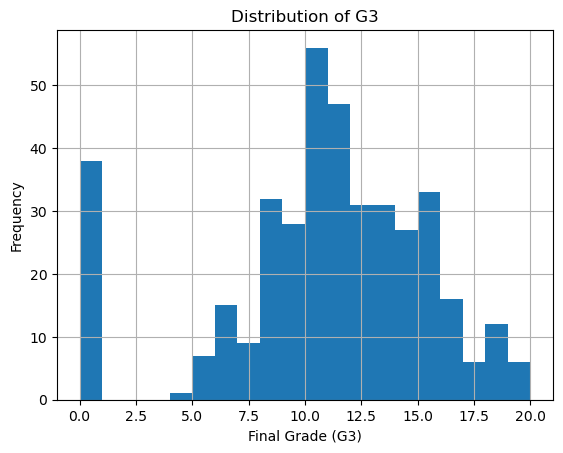

In [10]:
# Target Variable
import matplotlib.pyplot as plt
df_mat['G3'].hist(bins=20)
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.title('Distribution of G3')
plt.show()

In [11]:
categorical_columns = ['school', 'sex', 'address']
# Encode Categorical variables
df_mat = pd.get_dummies(df_mat, columns=categorical_columns, drop_first=True)

In [12]:
df_mat.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,1,1,3,6,5,6,6,False,False,True
1,17,GT3,T,1,1,at_home,other,course,father,1,...,1,1,3,4,5,5,6,False,False,True
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,2,3,3,10,7,8,10,False,False,True
3,15,GT3,T,4,2,health,services,home,mother,1,...,1,1,5,2,15,14,15,False,False,True
4,16,GT3,T,3,3,other,other,home,father,1,...,1,2,5,4,6,10,10,False,False,True


In [13]:
df_por = pd.get_dummies(df_por, columns=categorical_columns, drop_first=True)
df_por.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,1,1,3,4,0,11,11,False,False,True
1,17,GT3,T,1,1,at_home,other,course,father,1,...,1,1,3,2,9,11,11,False,False,True
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,2,3,3,6,12,13,12,False,False,True
3,15,GT3,T,4,2,health,services,home,mother,1,...,1,1,5,0,14,14,14,False,False,True
4,16,GT3,T,3,3,other,other,home,father,1,...,1,2,5,0,11,13,13,False,False,True


In [14]:
df_mat.schoolsup

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392     no
393     no
394     no
Name: schoolsup, Length: 395, dtype: object

In [15]:
df_mat['schoolsup'] = df_mat['schoolsup'].map({'yes': 1, 'no':0})

In [16]:
# Remove Correlated features
df_mat = df_mat.drop(columns=['G1', 'G2'])
df_por = df_por.drop(columns=['G1', 'G2'])

In [17]:
df_mat.absences

0       6
1       4
2      10
3       2
4       4
       ..
390    11
391     3
392     3
393     0
394     5
Name: absences, Length: 395, dtype: int64

In [18]:
# Normalize Numerical Features
df_mat_int64 = df_mat.select_dtypes(include = ['int64'])
df_por_int64 = df_por.select_dtypes(include = ['int64'])
df_mat_int64.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,1,4,3,4,1,1,3,6,6
1,17,1,1,1,2,0,0,5,3,3,1,1,3,4,6
2,15,1,1,1,2,3,1,4,3,2,2,3,3,10,10
3,15,4,2,1,3,0,0,3,2,2,1,1,5,2,15
4,16,3,3,1,2,0,0,4,3,2,1,2,5,4,10


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_mat[['age', 'absence', 'G3']] = scaler.fit_transform(df_mat[['age', 'traveltime', 'studytime']])
df_por[['age', 'absence', 'G3']] = scaler.fit_transform(df_por[['age', 'traveltime', 'studytime']])

In [20]:
# Distribution of performance
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
sns.histplot(df_mat.G3, bins=20)

<Axes: xlabel='G3', ylabel='Count'>

In [22]:
import seaborn as sns
sns.histplot(df_mat.G3[df_mat.G3>0.5], bins=3)

<Axes: xlabel='G3', ylabel='Count'>

In [23]:
# Split data
np.random.seed(2)

n_mat = len(df_mat)

n_train = int(n_mat * 0.6)
n_test = int(n_mat * 0.2)
n_val = n_mat - (n_train + n_test)

idx = np.arange(n_mat)
np.random.shuffle(idx)

df_mat_suffle = df_mat.iloc[idx]
df_mat_suffle

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,absence
94,0.000000,LE3,T,2,2,services,health,reputation,mother,1,...,4,1,1,4,6,1.000000,False,True,True,0.000000
32,0.000000,GT3,T,4,3,teacher,at_home,course,mother,1,...,2,1,1,5,0,0.333333,False,True,False,0.000000
222,0.142857,GT3,T,2,3,services,teacher,other,mother,1,...,1,1,1,3,2,0.333333,False,False,True,0.000000
329,0.285714,GT3,T,4,4,teacher,teacher,course,mother,2,...,3,1,2,4,4,0.666667,False,False,True,0.333333
369,0.428571,GT3,T,4,4,other,teacher,other,father,3,...,2,4,2,5,10,0.333333,True,False,False,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.428571,LE3,T,4,4,teacher,teacher,home,mother,1,...,2,2,2,1,5,0.000000,False,True,True,0.000000
22,0.142857,LE3,T,4,2,teacher,other,course,mother,1,...,1,1,3,5,2,0.333333,False,True,True,0.000000
72,0.000000,GT3,T,1,1,other,other,reputation,mother,1,...,4,2,4,5,2,0.333333,False,False,False,0.000000
15,0.142857,GT3,T,4,4,health,other,home,mother,1,...,4,1,2,2,4,0.000000,False,False,True,0.000000


In [24]:
# shuffle data
df_mat_train = df_mat_suffle.iloc[:n_train].copy()
df_mat_val = df_mat_suffle.iloc[n_train:n_train+n_val].copy()
df_mat_test = df_mat_suffle.iloc[n_train+n_val:].copy()
len(df_mat_train), len(df_mat_val), len(df_mat_test)

(237, 79, 79)

In [25]:
df_mat.size

12640

In [26]:
df_mat_train.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,absence
94,0.000000,LE3,T,2,2,services,health,reputation,mother,1,...,4,1,1,4,6,1.000000,False,True,True,0.000000
32,0.000000,GT3,T,4,3,teacher,at_home,course,mother,1,...,2,1,1,5,0,0.333333,False,True,False,0.000000
222,0.142857,GT3,T,2,3,services,teacher,other,mother,1,...,1,1,1,3,2,0.333333,False,False,True,0.000000
329,0.285714,GT3,T,4,4,teacher,teacher,course,mother,2,...,3,1,2,4,4,0.666667,False,False,True,0.333333
369,0.428571,GT3,T,4,4,other,teacher,other,father,3,...,2,4,2,5,10,0.333333,True,False,False,0.666667


In [27]:
# Reset index
df_mat_train.reset_index(level=None, drop=True, inplace=True)
df_mat_val.reset_index(level=None, drop=True, inplace=True)
df_mat_test.reset_index(level=None, drop=True, inplace=True)

In [28]:
# Set y, the predictive results
y_mat_train = df_mat_train.G3.values
y_mat_val = df_mat_val.G3.values
y_mat_test = df_mat_test.G3.values

In [29]:
del df_mat_train['G3']
del df_mat_val['G3']
del df_mat_test['G3']

In [30]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w [j]

    return res


In [31]:
def rmse(y_pred, y_train):
    se = (np.array(y_pred) - np.array(y_train)) ** 2
    se_mean = se.mean() # Sum all the elements and divide by the number of elements
    rmse = np.sqrt(se_mean)
    return rmse

In [90]:
base = [
    'age', 'sex_M', 'address_U', 'famsize', 'Pstatus',  # Demographic
    'Medu', 'Fedu',                                 # Parental education
    'Mjob', 'Fjob', 'schoolsup', 'famsup', 'guardian',  # Parental job/support
    'studytime', 'traveltime', 'failures',          # School habits
    'activities', 'higher', 'internet',             # Lifestyle
    'freetime', 'goout', 'romantic', 'absences',    # Free time and relationships
    'Dalc', 'Walc', 'health'                        # Substance use and health
]

In [92]:
df_mat_train.dtypes

age           float64
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup       int64
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
school_MS        bool
sex_M            bool
address_U        bool
absence       float64
dtype: object

In [188]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def prepare_X(df, fit_scaler=False):
    """
    Prepares the feature matrix for training or testing.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        fit_scaler (bool): Whether to fit the scaler (True for training, False for testing).
    
    Returns:
        np.ndarray: Prepared feature matrix (X).
    """
    df = df.copy()  # Avoid modifying the original dataframe

    # Encode binary features
    binary_columns = ['sex_M', 'address_U', 'higher', 'internet', 'romantic', 'activities']
    for col in binary_columns:
        if df[col].dtype == 'object':  # Map 'yes'/'no' to 1/0
            df[col] = df[col].map({'yes': 1, 'no': 0, 'M': 1, 'F': 0, 'U': 1, 'R': 0})
        elif df[col].dtype == 'bool':  # Convert boolean to integers
            df[col] = df[col].astype(int)

    # Encode categorical features
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})

    # Normalize numerical features
    numerical_columns = ['age', 'studytime', 'traveltime', 'absences', 'failures', 'Dalc', 'Walc', 'health']
    if fit_scaler:
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert all to numeric, replace NaNs with 0

    # Select features
    df_num = df[base]  # Use predefined base list
    df_num = df_num.fillna(0)  # Replace NaNs with 0

    # Convert to NumPy array
    X = df_num.values
    return X

In [190]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [192]:
# Prepare training data (fit_scaler=True to fit and transform the scaler)
X_mat_train = prepare_X(df_mat_train, fit_scaler=True)

# Train the model
w0, w = train_linear_regression_reg(X_mat_train, y_mat_train)

# Prepare validation data (fit_scaler=False to reuse the fitted scaler)
X__mat_val = prepare_X(df_mat_test, fit_scaler=False)

# Make predictions
y_mat_pred = w0 + X__mat_val.dot(w)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_mat_test, y_mat_pred))
print(f"RMSE: {rmse}")

RMSE: 1.836429619926639e-05
